In [11]:
from skimage.io import imread
import os

parent_path = r'D:\images\tnia-python-images\imagesc\2025_12_10_better_segmentation'

im_name = os.path.join(parent_path, 'shanel_subvolnew.tiff')
img = imread(im_name)



img.shape


(3, 170, 600, 900)

In [5]:
import napari

viewer = napari.Viewer()
viewer.add_image(img)

<Image layer 'img' at 0x178b44467b0>

Plot middle z-plane for channels 1 and 2 (C,Z,Y,X).

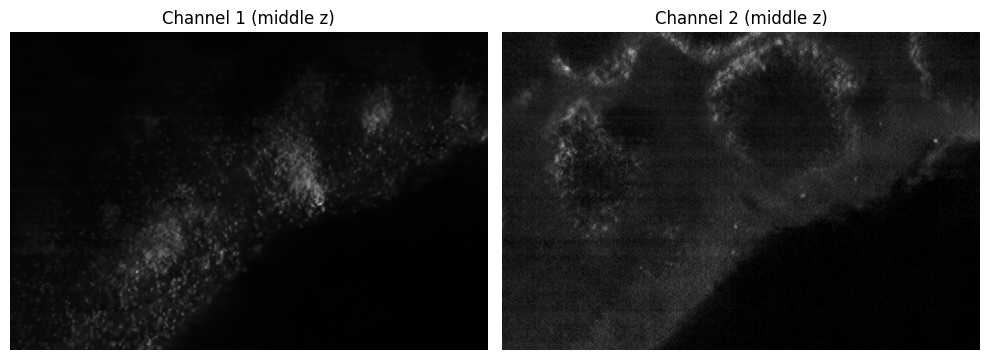

In [8]:
import matplotlib.pyplot as plt

# img shape: (C, Z, Y, X)
mid_z = img.shape[1] // 2
ch1 = img[1, mid_z]
ch2 = img[2, mid_z]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(ch1, cmap='gray')
axes[0].set_title('Channel 1 (middle z)')
axes[0].axis('off')

axes[1].imshow(ch2, cmap='gray')
axes[1].set_title('Channel 2 (middle z)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Apply global Otsu and local Otsu thresholds to channels 1 and 2; show in rows 2 and 3 below the original images.

c:\Users\bnort\miniconda3\envs\easy_augment_pytorch\Lib\site-packages\skimage\filters\rank\generic.py:332: UserWarning: Bad rank filter performance is expected due to a large number of bins (4027), equivalent to an approximate bitdepth of 12.0.
  image, footprint, out, mask, n_bins = _preprocess_input(


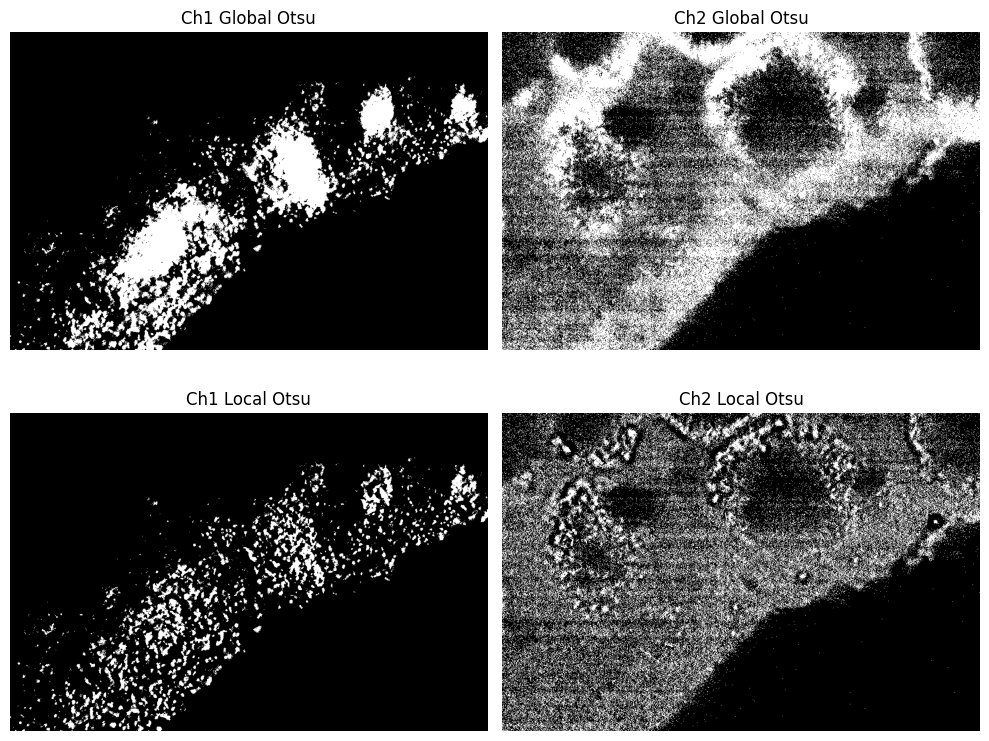

In [12]:
from skimage.filters import threshold_otsu, rank
from skimage.morphology import disk

# Use previously defined ch1, ch2
# Compute global Otsu
th1 = threshold_otsu(ch1)
mask1_global = (ch1 >= th1)

th2 = threshold_otsu(ch2)
mask2_global = (ch2 >= th2)

# Compute local Otsu using rank.otsu with a disk window
selem = disk(15)
local1 = rank.otsu(ch1.astype('uint16'), selem)
mask1_local = (ch1 >= local1)

local2 = rank.otsu(ch2.astype('uint16'), selem)
mask2_local = (ch2 >= local2)

# use global otsu to mask noisy pixels from local otsu
mask1_local = mask1_local & mask1_global
mask2_local = mask2_local & mask2_global

# Plot: Row 1 originals (already plotted), Row 2 global, Row 3 local
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].imshow(mask1_global, cmap='gray')
axes[0,0].set_title('Ch1 Global Otsu')
axes[0,0].axis('off')

axes[0,1].imshow(mask2_global, cmap='gray')
axes[0,1].set_title('Ch2 Global Otsu')
axes[0,1].axis('off')

axes[1,0].imshow(mask1_local, cmap='gray')
axes[1,0].set_title('Ch1 Local Otsu')
axes[1,0].axis('off')

axes[1,1].imshow(mask2_local, cmap='gray')
axes[1,1].set_title('Ch2 Local Otsu')
axes[1,1].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(parent_path, 'otsu_comparison.png'))

plt.show()